**MNIST Hand writing digit**

***Listing 2.1 Loading the MNIST dataset in Keras***

In [ ]:
!pip install --upgrade tensorflow

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images[0]

In [ ]:
train_images[0].ndim

In [ ]:
train_images[0].shape

In [ ]:
train_images.shape

In [ ]:
test_images.shape

In [ ]:
train_labels[0]

Listing 2.2 The network architecture

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

**Listing 2.3 The compilation step**

In [ ]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

**Listing 2.4 Preparing the image data**

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

**Listing 2.5 Preparing the labels**

In [ ]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.ndim)

print(train_images.shape)

print(train_images.dtype)

**Listing 2.6 Displaying the fourth digit**

In [ ]:
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()


In [ ]:
train_labels[4]

**MNIST Fashion**

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images  = training_images / 255.0
test_images = test_images / 255.0
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = tf.keras.optimizers.Adam(), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])


model.fit(training_images, training_labels, epochs=5, batch_size=128)
model.evaluate(test_images, test_labels)


**Cost Function**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import io

from google.colab import files
uploaded = files.upload()

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd


In [3]:

df = pd.read_csv('weight-height.csv')

df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


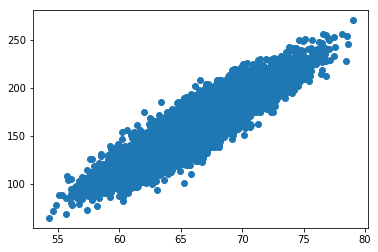

In [4]:
plt.scatter(x=df.Height, y=df.Weight)
plt.show()

In [5]:
X=df[['Height']].values
y_true=df[['Weight']].values

In [6]:
def line(x, w=0, b=0):
    return w*x+b

def mean_squared_error(y_true, y_pred):
    s=(y_true-y_pred)**2
    return np.sqrt(s.mean())

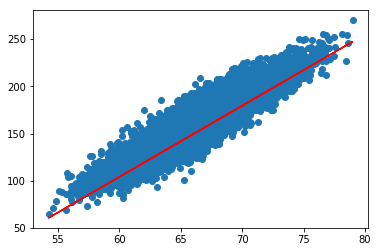

In [15]:
plt.scatter(df.Height, df.Weight)
p_line = line(X,w=7.548083,b=-348.96017)
plt.plot(df.Height, p_line, color='red' )
plt.show()

In [14]:
import numpy as np
mean_squared_error(y_true,p_line)

27.58085322508312

In [ ]:
7.548083,-348.96017

In [ ]:
plt.figure(figsize=(10,5))
ax1=plt.subplot(121)
df.plot(kind='scatter', 
       x='Height',
       y='Weight',
       title='Weight and Height in adults', ax=ax1)
bs=np.array([-100,-50,0,50,100,150])
mses=[]
for b in bs:
    y_pred=line(X, w=2, b=b)
    mse=mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X,y_pred)
    
ax2=plt.subplot(122)
plt.plot(bs, mses, 'o-')
plt.title('cost as a function of b')
plt.xlabel('b')

**Linear Regression With Keras** 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam, SGD

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['weight-height.csv']))

df.head()

In [ ]:
X=df[['Height']].values
y_true=df[['Weight']].values

In [ ]:
X

In [ ]:
X.shape

In [ ]:
model = Sequential()
model.add(Dense(1, input_shape=(1,)))

In [ ]:
model.summary()

In [ ]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [ ]:
model.fit(X,y_true, epochs=40)

In [ ]:
y_pred=model.predict(X)

In [ ]:
y_pred

In [ ]:
df.plot(kind='scatter',
       x='Height',
       y='Weight', title='Weight and Height in adults')
plt.plot(X, y_pred, color='red', linewidth=3)

In [ ]:
w,b=model.get_weights()

In [ ]:
w

In [ ]:
b

In [ ]:
model.predict([[200]])